In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Sex_Code'] = df['Sex'].map({'male': 0, 'female': 1})

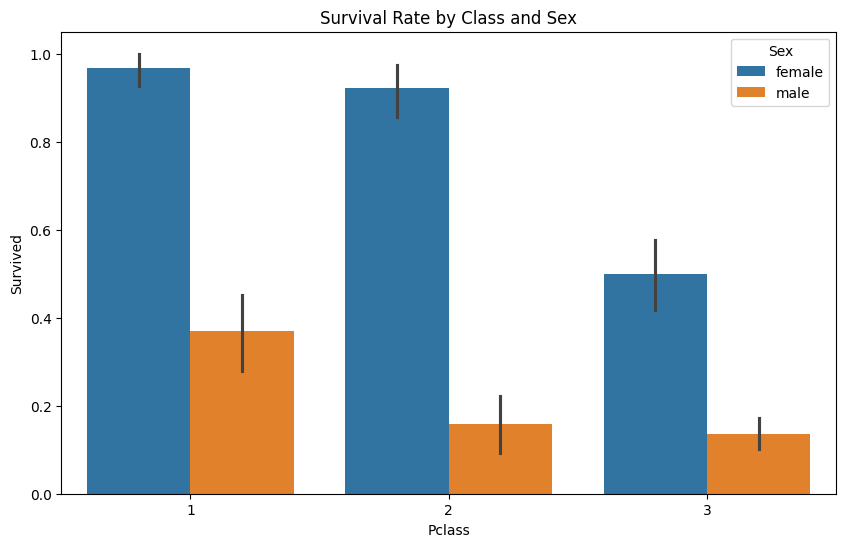

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title("Survival Rate by Class and Sex")
plt.show()

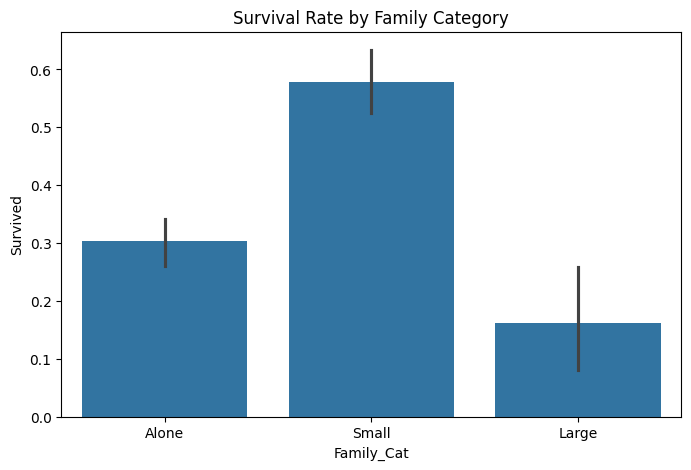

In [14]:
def family_category(size):
    if size == 1:
        return 'Alone'
    elif 2<=size <=4:
        return 'Small'
    else:
        return 'Large'
df['Family_Cat'] = df['FamilySize'].apply(family_category)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Family_Cat', y='Survived', order=['Alone', 'Small', 'Large'])
plt.title("Survival Rate by Family Category")
plt.show()

🚢 Titanic 데이터 분석 최종 리포트
1. 개요
목표: 타이타닉 탑승객 데이터를 분석하여 생존에 영향을 미친 요소를 찾는다.
데이터: 총 891명의 승객 정보 (Kaggle Data)
2. 주요 발견 (Insights)
성별과 계급: '여성'과 '1등석' 승객이 압도적으로 높은 생존율을 보였다. (Lady First, Money Power)
가족의 규모: 혼자보다는 가족이 있는 경우 생존율이 높았으나, 가족이 너무 클 경우(5인 이상) 오히려 생존율이 급감했다.
나이: 영유아(0~5세)의 생존율이 상대적으로 높아, 아이들을 보호하려는 경향이 확인되었다.
3. 결론
생존 여부는 운이 아니라 사회적 지위(Pclass), 성별(Sex), 그리고 동반 가족의 유무에 의해 구조적으로 결정되었다.